In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data quality check for each table

**brands.csv**

In [15]:
brands = pd.read_csv("brands.csv")
brands.head()

,ID,BARCODE,BRAND_CODE,CPG_ID,CATEGORY,CATEGORY_CODE,NAME,ROMANCE_TEXT,RELATED_BRAND_IDS
0,5a8c35dde4b0ccf165fac9e6,511111904175,PEPPERIDGE FARM,5a734034e4b0d58f376be874,Grocery,GROCERY,Pepperidge Farm,Pepperidge Farm has been making exceptional co...,NaN
1,6234af8f4e09b6067c237adb,511111212997,CHEX MIX,6233966e8942a67af4934aa1,Snacks,SNACKS,CHEX MIX,NaN,NaN
2,5332f7d3e4b03c9a25efd14e,511111803393,NaN,5332f5f2e4b03c9a25efd0aa,Snacks,SNACKS,Cheez-It,NaN,NaN
3,5d6412e9a3a018514994f426,511111304982,BETTER HOMES & GARDENS,53e10d6368abd3c7065097cc,Magazines,MAGAZINES,Better Homes & Gardens Magazine,Better Homes & Gardens offers beautiful photog...,5d6413156d5f3b23d1bc790a : 5d6417dda3a01851499...
4,621e777eacedc065cefa99a7,511111912859,TRUVIA,621e7754d759b10969cbcc08,Baking,BAKING,Truvia®,NaN,NaN


In [16]:
brands.isna().sum()

ID                     0
BARCODE                0
BRAND_CODE            25
CPG_ID                 0
CATEGORY              27
CATEGORY_CODE         31
NAME                   0
ROMANCE_TEXT         103
RELATED_BRAND_IDS    243
dtype: int64

In [17]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 406 non-null    object
 1   BARCODE            406 non-null    int64 
 2   BRAND_CODE         381 non-null    object
 3   CPG_ID             406 non-null    object
 4   CATEGORY           379 non-null    object
 5   CATEGORY_CODE      375 non-null    object
 6   NAME               406 non-null    object
 7   ROMANCE_TEXT       303 non-null    object
 8   RELATED_BRAND_IDS  163 non-null    object
dtypes: int64(1), object(8)
memory usage: 28.7+ KB


**receipt_items.csv**

In [18]:
items = pd.read_csv("receipt_items.csv")
items.head()

,REWARDS_RECEIPT_ID,ITEM_INDEX,REWARDS_RECEIPT_ITEM_ID,DESCRIPTION,BARCODE,BRAND_CODE,QUANTITY_PURCHASED,TOTAL_FINAL_PRICE,POINTS_EARNED,REWARDS_GROUP,ORIGINAL_RECEIPT_ITEM_TEXT,MODIFY_DATE
0,60bb28c10a720d557b128262,0,1efd6d7c75ecbae32214acb6cda41d12,RLGULAR SALE,NaN,NaN,1.0,9.99,NaN,NaN,RLGULAR SALE,2021-06-05T07:33:36.91Z
1,60bb28c10a720d557b128262,1,79482a8fa3bd0eef3d626f1c862042e8,82 GOURMET HOUSEW,000240292012,NaN,1.0,4.99,NaN,NaN,82 GOURMET HOUSEW,2021-06-05T07:33:36.91Z
2,627151230a724d730825106a,0,b26669cf4ce90cc9d7d3b0ab588cb04b,GOLDILOCKS NOPIA R BLAGK,NaN,NaN,1.0,4.75,NaN,NaN,GOLDILOCKS NOPIA R BLAGK,2022-05-03T15:58:41.769Z
3,627151230a724d730825106a,1,b4fafd04d8274a1e95b97155edaade2f,KURI-IRI DORAYAKI CAKE,NaN,NaN,1.0,5.99,NaN,NaN,KURI-IRI DORAYAKI CAKE,2022-05-03T15:58:41.769Z
4,627151230a724d730825106a,2,39694b0880b511e8a12bfb76cf2c20f3,YIZMANG FISH BALL,NaN,NaN,1.0,12.00,NaN,NaN,YIZMANG FISH BALL,2022-05-03T15:58:41.769Z


In [19]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360377 entries, 0 to 360376
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   REWARDS_RECEIPT_ID          360377 non-null  object 
 1   ITEM_INDEX                  360377 non-null  int64  
 2   REWARDS_RECEIPT_ITEM_ID     360377 non-null  object 
 3   DESCRIPTION                 359286 non-null  object 
 4   BARCODE                     225008 non-null  object 
 5   BRAND_CODE                  154887 non-null  object 
 6   QUANTITY_PURCHASED          352621 non-null  float64
 7   TOTAL_FINAL_PRICE           359685 non-null  float64
 8   POINTS_EARNED               18952 non-null   float64
 9   REWARDS_GROUP               61937 non-null   object 
 10  ORIGINAL_RECEIPT_ITEM_TEXT  358696 non-null  object 
 11  MODIFY_DATE                 360377 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 33.0+ MB


In [20]:
items.isna().sum()

REWARDS_RECEIPT_ID                 0
ITEM_INDEX                         0
REWARDS_RECEIPT_ITEM_ID            0
DESCRIPTION                     1091
BARCODE                       135369
BRAND_CODE                    205490
QUANTITY_PURCHASED              7756
TOTAL_FINAL_PRICE                692
POINTS_EARNED                 341425
REWARDS_GROUP                 298440
ORIGINAL_RECEIPT_ITEM_TEXT      1681
MODIFY_DATE                        0
dtype: int64

**Nearly 1/3 of the items are missing with brand_code here.**

**It is quite critical because the lack of brand_code makes it fail to investigate on the performance of each brand. For example, we can look into brands with stable high sales performance or brands with a stable group of customers. But since there are a huge amount of missing value, I believe the analysis results are not reasonable enough.**

**Since item.BRAND_CODE is the only foreign key referring to brands table among these four tables, the missing value needs to be clarified with the help from stakeholders.**

**receipts.csv**

In [21]:
receipts = pd.read_csv("receipts.csv")
receipts.head()


,ID,STORE_NAME,PURCHASE_DATE,PURCHASE_TIME,DATE_SCANNED,TOTAL_SPENT,REWARDS_RECEIPT_STATUS,USER_ID,USER_VIEWED,PURCHASED_ITEM_COUNT,...,PENDING_DATE,MODIFY_DATE,FLAGGED_DATE,PROCESSED_DATE,FINISHED_DATE,REJECTED_DATE,NEEDS_FETCH_REVIEW,DIGITAL_RECEIPT,DELETED,NON_POINT_EARNING_RECEIPT
0,62868f660a72546bef0b2dd0,TOWN OF ROCKY MOUNT,2022-05-19T00:00:00Z,2:05 PM,2022-05-19T18:41:42.53Z,859.87,FINISHED,61375682c625197c5db73602,True,1.0,...,2022-05-19T18:57:57.228Z,2022-05-22T11:20:57.998Z,2022-05-19T18:42:57.042Z,NaN,2022-05-19T18:57:57.336Z,NaN,NaN,False,NaN,True
1,6096b7370a7216d316001149,NaN,NaN,NaN,2021-05-08T16:07:19.03Z,NaN,SUBMITTED,60047e8a2d7db612a69d2e18,True,NaN,...,NaN,2021-05-08T16:07:19.03Z,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2,6269a4ea0a7241077408b6e1,FAMILY DOLLAR,2022-04-27T00:00:00Z,4:15 PM,2022-04-27T20:17:46.09Z,11.00,FINISHED,61578e96c2fb9321213720fc,True,2.0,...,2022-04-27T20:17:54.214Z,2022-04-27T20:17:55.521Z,NaN,NaN,2022-04-27T20:17:54.394Z,NaN,NaN,False,NaN,False
3,625b25e70a723eb9730d2c9c,PUBLIX,2022-04-15T00:00:00Z,4:45 PM,2022-04-16T20:24:07.259Z,10.67,FINISHED,6048de2ec9106b12d2b1ff61,True,4.0,...,2022-04-16T20:24:23.399Z,2022-04-16T20:24:24.064Z,NaN,NaN,2022-04-16T20:24:23.598Z,NaN,NaN,False,NaN,False
4,60e3bd7e0a7215bd550fb8cc,COSTCO,2021-06-30T00:00:00Z,1:16 PM,2021-07-06T02:18:38.495Z,61.90,FINISHED,6048de2ec9106b12d2b1ff61,True,10.0,...,2021-07-06T02:18:49.55Z,2021-07-06T02:18:51.906Z,NaN,NaN,2021-07-06T02:18:50.283Z,NaN,NaN,False,NaN,False


In [69]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70601 entries, 0 to 70600
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         70601 non-null  object 
 1   STORE_NAME                 68765 non-null  object 
 2   PURCHASE_DATE              68535 non-null  object 
 3   PURCHASE_TIME              65654 non-null  object 
 4   DATE_SCANNED               70601 non-null  object 
 5   TOTAL_SPENT                69109 non-null  float64
 6   REWARDS_RECEIPT_STATUS     70601 non-null  object 
 7   USER_ID                    70601 non-null  object 
 8   USER_VIEWED                64136 non-null  object 
 9   PURCHASED_ITEM_COUNT       69149 non-null  float64
 10  CREATE_DATE                70601 non-null  object 
 11  PENDING_DATE               69148 non-null  object 
 12  MODIFY_DATE                70599 non-null  object 
 13  FLAGGED_DATE               4025 non-null   obj

In [22]:
receipts.isna().sum()

ID                               0
STORE_NAME                    1836
PURCHASE_DATE                 2066
PURCHASE_TIME                 4947
DATE_SCANNED                     0
TOTAL_SPENT                   1492
REWARDS_RECEIPT_STATUS           0
USER_ID                          0
USER_VIEWED                   6465
PURCHASED_ITEM_COUNT          1452
CREATE_DATE                      0
PENDING_DATE                  1453
MODIFY_DATE                      2
FLAGGED_DATE                 66576
PROCESSED_DATE               70601
FINISHED_DATE                 6252
REJECTED_DATE                66217
NEEDS_FETCH_REVIEW           70276
DIGITAL_RECEIPT                  0
DELETED                      69733
NON_POINT_EARNING_RECEIPT     8986
dtype: int64

In [27]:
# when dealing with data, only useful columns are kept
receipts_applied = receipts[['ID','STORE_NAME','PURCHASE_DATE','PURCHASE_TIME','DATE_SCANNED','TOTAL_SPENT','USER_ID','STORE_NAME','REWARDS_RECEIPT_STATUS']]

In [29]:
# after dropping unused columns, the final table doesn't effect results a lot
# however, the lack in items like 'PURCHASE_DATE' may also cause minor errors in analysis
receipts_applied.isna().sum()

ID                           0
STORE_NAME                1836
PURCHASE_DATE             2066
PURCHASE_TIME             4947
DATE_SCANNED                 0
TOTAL_SPENT               1492
USER_ID                      0
STORE_NAME                1836
REWARDS_RECEIPT_STATUS       0
dtype: int64

**users.csv**

In [23]:
users = pd.read_csv("users.csv")
users.head()

,CREATED_DATE,BIRTH_DATE,GENDER,LAST_REWARDS_LOGIN,STATE,SIGN_UP_PLATFORM,SIGN_UP_SOURCE,ID
0,2021-12-20T00:29:17.118Z,1984-03-20T00:00:00Z,transgender,2023-01-04T16:32:15Z,FL,NaN,Apple,61bfce5d6655417f803b6538
1,2021-10-21T17:15:25.825Z,1987-08-08T05:00:00Z,prefer_not_to_say,2023-01-04T16:04:33Z,PA,unknown,Google,6171a02d8034995a3d858fb3
2,2021-10-23T19:19:18.305Z,1995-06-18T05:00:00Z,male,2023-01-04T16:13:13Z,FL,NaN,Apple,617460366e2684498143e769
3,2021-03-30T02:35:41.249Z,1999-08-23T07:00:00Z,transgender,2023-01-04T16:09:51Z,MI,ios,Google,60628e7d85cdff011de41113
4,2021-04-26T23:15:54.375Z,1992-10-28T16:16:23Z,male,2023-01-04T16:24:18Z,CA,andrioid,Email,608749aac63a95130a45fbf4


In [68]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CREATED_DATE        164 non-null    object
 1   BIRTH_DATE          164 non-null    object
 2   GENDER              164 non-null    object
 3   LAST_REWARDS_LOGIN  164 non-null    object
 4   STATE               164 non-null    object
 5   SIGN_UP_PLATFORM    119 non-null    object
 6   SIGN_UP_SOURCE      164 non-null    object
 7   ID                  164 non-null    object
dtypes: object(8)
memory usage: 10.4+ KB


In [24]:
users.isna().sum()

CREATED_DATE           0
BIRTH_DATE             0
GENDER                 0
LAST_REWARDS_LOGIN     0
STATE                  0
SIGN_UP_PLATFORM      45
SIGN_UP_SOURCE         0
ID                     0
dtype: int64

### Further analysis

**customer image of high purchasing power customers and frequent customers**

In [31]:
com_user = pd.merge(users, receipts, left_on='ID', right_on='USER_ID')

In [32]:
com_user

,CREATED_DATE,BIRTH_DATE,GENDER,LAST_REWARDS_LOGIN,STATE,SIGN_UP_PLATFORM,SIGN_UP_SOURCE,ID_x,ID_y,STORE_NAME,...,PENDING_DATE,MODIFY_DATE,FLAGGED_DATE,PROCESSED_DATE,FINISHED_DATE,REJECTED_DATE,NEEDS_FETCH_REVIEW,DIGITAL_RECEIPT,DELETED,NON_POINT_EARNING_RECEIPT
0,2021-12-20T00:29:17.118Z,1984-03-20T00:00:00Z,transgender,2023-01-04T16:32:15Z,FL,NaN,Apple,61bfce5d6655417f803b6538,6231035e0a722cf6a06cc5ef,CHAMPS SPORTS,...,2022-03-15T21:22:23.632Z,2022-03-15T21:22:28.859Z,NaN,NaN,2022-03-15T21:22:23.749Z,NaN,NaN,False,NaN,True
1,2021-12-20T00:29:17.118Z,1984-03-20T00:00:00Z,transgender,2023-01-04T16:32:15Z,FL,NaN,Apple,61bfce5d6655417f803b6538,62dc581a0a72218a1007361a,WALMART,...,2022-07-23T20:21:02.041Z,2022-07-23T20:21:05.981Z,NaN,NaN,NaN,2022-07-23T20:21:02.176Z,NaN,False,NaN,False
2,2021-12-20T00:29:17.118Z,1984-03-20T00:00:00Z,transgender,2023-01-04T16:32:15Z,FL,NaN,Apple,61bfce5d6655417f803b6538,620537fb0a722668830aa0ff,WALMART,...,2022-02-10T16:21:39.454Z,2022-02-11T16:44:32.95Z,2022-02-10T16:06:39.305Z,NaN,2022-02-10T16:21:39.54Z,NaN,NaN,False,NaN,False
3,2021-12-20T00:29:17.118Z,1984-03-20T00:00:00Z,transgender,2023-01-04T16:32:15Z,FL,NaN,Apple,61bfce5d6655417f803b6538,6261d3220a723a34a42476b4,GOODWILL,...,2022-04-21T21:57:10.294Z,2022-04-21T21:57:29.39Z,NaN,NaN,2022-04-21T21:57:10.463Z,NaN,NaN,False,NaN,False
4,2021-12-20T00:29:17.118Z,1984-03-20T00:00:00Z,transgender,2023-01-04T16:32:15Z,FL,NaN,Apple,61bfce5d6655417f803b6538,622cff020a725b3b050bf25d,WALMART,...,2022-03-12T20:14:05.462Z,2022-03-12T20:14:07.352Z,NaN,NaN,2022-03-12T20:14:05.646Z,NaN,NaN,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70596,2021-04-12T20:10:38.644Z,1982-10-18T06:00:00Z,prefer_not_to_say,2023-01-04T16:49:53Z,TX,NaN,Google,6074a93e9e7cc537c2d23fa4,6363ab3e0a7222c2154c95d1,BEST BUY,...,2022-11-03T11:51:49.462Z,2022-11-03T11:51:50.213Z,NaN,NaN,2022-11-03T11:51:49.603Z,NaN,NaN,False,NaN,True
70597,2021-04-12T20:10:38.644Z,1982-10-18T06:00:00Z,prefer_not_to_say,2023-01-04T16:49:53Z,TX,NaN,Google,6074a93e9e7cc537c2d23fa4,620a9fd20a724d2b7a0f910d,H-E-B,...,2022-02-14T18:31:03.982Z,2022-02-14T18:31:04.655Z,NaN,NaN,2022-02-14T18:31:04.109Z,NaN,NaN,False,NaN,False
70598,2021-04-12T20:10:38.644Z,1982-10-18T06:00:00Z,prefer_not_to_say,2023-01-04T16:49:53Z,TX,NaN,Google,6074a93e9e7cc537c2d23fa4,6363aaf70a723d62664c4478,H-E-B,...,2022-11-03T11:50:25.999Z,2022-11-03T11:50:26.797Z,NaN,NaN,2022-11-03T11:50:26.166Z,NaN,NaN,False,NaN,False
70599,2021-04-12T20:10:38.644Z,1982-10-18T06:00:00Z,prefer_not_to_say,2023-01-04T16:49:53Z,TX,NaN,Google,6074a93e9e7cc537c2d23fa4,613a24b10a720c269400099e,WALMART,...,2021-09-09T15:14:10.914Z,2021-09-09T15:14:13.217Z,NaN,NaN,2021-09-09T15:14:11.289Z,NaN,NaN,False,NaN,False


**In this part, we find the top50 rich customers. Over the record, they spend the top amount of dollars.**

In [74]:
spent_user = com_user.groupby('ID_x').agg({'TOTAL_SPENT': 'sum'})

In [75]:
spent_user

,TOTAL_SPENT
ID_x,
5fef29605b73fc128b245f36,73315.84
5ff48849291b6b12931ce51f,12340.98
5ffb49a847903912705e9a64,218211.45
5ffdf6f6224dc11273156070,15360.19
6001dbb3878e221317c8a065,2523.17
...,...
61b3af1deae64d29568176d7,672.01
61b450154d2ff607dab7c0aa,51332.49
61b8e6ab3c43881d14ba868d,9155.59


In [137]:
# we consider the first 1/2 users by ordering their total_spent in descending order

In [106]:
spent_user_max = spent_user.sort_values(by='TOTAL_SPENT', ascending=False).head(30)

In [107]:
max_spent_user_info = users[users['ID'].isin(spent_user_max.index)]

In [108]:
max_spent_user_info['spent_amout'] = spent_user_max.values

/var/folders/97/1d90bsln0k77tbcmbxc659fr0000gn/T/ipykernel_49119/1198573664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_spent_user_info['spent_amout'] = spent_user_max.values


In [109]:
max_spent_user_info

,CREATED_DATE,BIRTH_DATE,GENDER,LAST_REWARDS_LOGIN,STATE,SIGN_UP_PLATFORM,SIGN_UP_SOURCE,ID,spent_amout
4,2021-04-26T23:15:54.375Z,1992-10-28T16:16:23Z,male,2023-01-04T16:24:18Z,CA,andrioid,Email,608749aac63a95130a45fbf4,218211.45
9,2021-02-05T15:17:25.9Z,1953-05-23T05:00:00Z,prefer_not_to_say,2023-01-04T16:31:04Z,OH,NaN,Facebook,601d61856788c012f7a1b276,213197.99
12,2021-12-30T21:43:36.219Z,1981-06-14T05:00:00Z,prefer_not_to_say,2023-01-04T16:31:08Z,IN,andrioid,Apple,61ce28087ef94f1a020d40ca,192838.56
13,2021-09-05T13:33:26.945Z,1974-04-22T05:00:00Z,male,2023-01-04T16:04:24Z,CT,NaN,Email,6134c726bb1615636197f943,134434.34
15,2021-06-02T16:29:53.254Z,1964-04-30T05:00:00Z,female,2023-01-04T16:28:05Z,MI,ios,Apple,60b7b2011d501f6c02387b62,83072.44
16,2021-09-07T12:09:38.685Z,1957-12-28T05:00:00Z,prefer_not_to_say,2023-01-04T16:16:48Z,NC,unknown,Apple,61375682c625197c5db73602,82538.82
19,2021-05-09T03:28:30.955Z,1956-01-06T22:29:09Z,female,2023-01-04T16:19:35Z,MN,NaN,Email,609756de547223427a2c627e,73577.40
23,2021-10-01T22:41:26.419Z,1983-05-13T00:00:00Z,transgender,2023-01-04T17:03:36Z,FL,ios,Google,61578e96c2fb9321213720fc,73315.84
27,2021-07-27T16:47:48.044Z,1975-01-19T04:00:00Z,male,2023-01-04T16:59:38Z,FL,andrioid,Google,610038b4f5d93a3f032387f0,70354.37
29,2021-01-01T13:53:36.994Z,1966-09-02T05:00:00Z,transgender,2023-01-04T16:59:08Z,NY,andrioid,Email,5fef29605b73fc128b245f36,70187.77


**We extract information from these users and make a plot regarding residental states and ages. We can see the distribution of population with high purchasing power.**

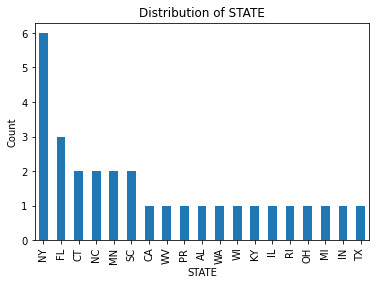

In [129]:
max_spent_user_info['STATE'].value_counts().plot.bar()
plt.xlabel('STATE')
plt.ylabel('Count')
plt.title('Distribution of STATE')
plt.show()

<AxesSubplot:>

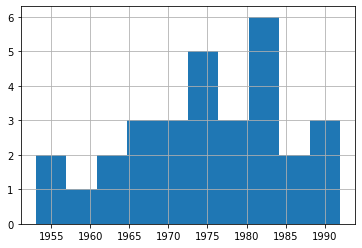

In [135]:
pd.to_datetime(max_spent_user_info['BIRTH_DATE']).dt.year.hist()

**This parts find the top50 frequent users. Over the record, they purchase goods quite often.**

In [122]:
fre_user = com_user['ID_x'].value_counts().sort_values(ascending=False).head(50)

In [123]:
fre_user_info = users[users['ID'].isin(fre_user.index)]

In [125]:
fre_user_info['purchase_times'] = fre_user.values

/var/folders/97/1d90bsln0k77tbcmbxc659fr0000gn/T/ipykernel_49119/1864483489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fre_user_info['purchase_times'] = fre_user.values


In [127]:
fre_user_info

,CREATED_DATE,BIRTH_DATE,GENDER,LAST_REWARDS_LOGIN,STATE,SIGN_UP_PLATFORM,SIGN_UP_SOURCE,ID,purchase_times
0,2021-12-20T00:29:17.118Z,1984-03-20T00:00:00Z,transgender,2023-01-04T16:32:15Z,FL,NaN,Apple,61bfce5d6655417f803b6538,2872
2,2021-10-23T19:19:18.305Z,1995-06-18T05:00:00Z,male,2023-01-04T16:13:13Z,FL,NaN,Apple,617460366e2684498143e769,2296
3,2021-03-30T02:35:41.249Z,1999-08-23T07:00:00Z,transgender,2023-01-04T16:09:51Z,MI,ios,Google,60628e7d85cdff011de41113,1848
4,2021-04-26T23:15:54.375Z,1992-10-28T16:16:23Z,male,2023-01-04T16:24:18Z,CA,andrioid,Email,608749aac63a95130a45fbf4,1805
9,2021-02-05T15:17:25.9Z,1953-05-23T05:00:00Z,prefer_not_to_say,2023-01-04T16:31:04Z,OH,NaN,Facebook,601d61856788c012f7a1b276,1796
11,2021-04-16T11:38:10.534Z,1955-04-04T05:00:00Z,transgender,2023-01-04T16:04:25Z,IL,ios,Email,607977220eb8310a043a61db,1746
12,2021-12-30T21:43:36.219Z,1981-06-14T05:00:00Z,prefer_not_to_say,2023-01-04T16:31:08Z,IN,andrioid,Apple,61ce28087ef94f1a020d40ca,1630
13,2021-09-05T13:33:26.945Z,1974-04-22T05:00:00Z,male,2023-01-04T16:04:24Z,CT,NaN,Email,6134c726bb1615636197f943,1573
15,2021-06-02T16:29:53.254Z,1964-04-30T05:00:00Z,female,2023-01-04T16:28:05Z,MI,ios,Apple,60b7b2011d501f6c02387b62,1493
16,2021-09-07T12:09:38.685Z,1957-12-28T05:00:00Z,prefer_not_to_say,2023-01-04T16:16:48Z,NC,unknown,Apple,61375682c625197c5db73602,1323


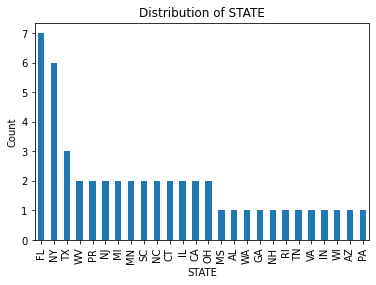

In [131]:
fre_user_info['STATE'].value_counts().plot.bar()
plt.xlabel('STATE')
plt.ylabel('Count')
plt.title('Distribution of STATE')
plt.show()

**The geographical distribution of high-purchasing power customers and frequent customers differs. It may gives some idea on sales. For example, in some states like FL, we may consider raise the item price as there have been most frequent users from FL.**

<AxesSubplot:>

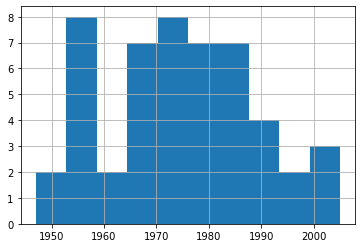

In [136]:
pd.to_datetime(fre_user_info['BIRTH_DATE']).dt.year.hist()

**Also, the distribution of ages differs. Generally speaking, the middle-age are both rich and free.**

**Targeting strategies can be made to elderly, which have time but more considerable when spending money.**

**Targeting stategies can also be made to the young-age.**

**Low Season and High Season**

In [138]:
sale = pd.merge(receipts, items, left_on='ID', right_on='REWARDS_RECEIPT_ID',right_index = False)

In [139]:
sale

,ID,STORE_NAME,PURCHASE_DATE,PURCHASE_TIME,DATE_SCANNED,TOTAL_SPENT,REWARDS_RECEIPT_STATUS,USER_ID,USER_VIEWED,PURCHASED_ITEM_COUNT,...,REWARDS_RECEIPT_ITEM_ID,DESCRIPTION,BARCODE,BRAND_CODE,QUANTITY_PURCHASED,TOTAL_FINAL_PRICE,POINTS_EARNED,REWARDS_GROUP,ORIGINAL_RECEIPT_ITEM_TEXT,MODIFY_DATE_y
0,62868f660a72546bef0b2dd0,TOWN OF ROCKY MOUNT,2022-05-19T00:00:00Z,2:05 PM,2022-05-19T18:41:42.53Z,859.87,FINISHED,61375682c625197c5db73602,True,1.0,...,16c56fb28ecbec82e901331d68228f1f,abraxas LP,32032,NaN,1.0,859.87,NaN,NaN,CHCCK,2022-05-22T11:20:57.998Z
1,6269a4ea0a7241077408b6e1,FAMILY DOLLAR,2022-04-27T00:00:00Z,4:15 PM,2022-04-27T20:17:46.09Z,11.00,FINISHED,61578e96c2fb9321213720fc,True,2.0,...,11c57ddd5747d37822c897a25f9e7768,Homeline Concentrated Regular Bleach,032251542848,HOMELINE,1.0,5.50,NaN,NaN,HL CONCENTRATED REGULAR BLEACH 121FL OZ,2022-04-27T20:17:55.521Z
2,6269a4ea0a7241077408b6e1,FAMILY DOLLAR,2022-04-27T00:00:00Z,4:15 PM,2022-04-27T20:17:46.09Z,11.00,FINISHED,61578e96c2fb9321213720fc,True,2.0,...,3df03ec0abcaa96146a3f8591bd0f492,Homeline Concentrated Regular Bleach,032251542848,HOMELINE,1.0,5.50,NaN,NaN,HL CONCENTRATED REGULAR BLEACH 121FL OZ,2022-04-27T20:17:55.521Z
3,625b25e70a723eb9730d2c9c,PUBLIX,2022-04-15T00:00:00Z,4:45 PM,2022-04-16T20:24:07.259Z,10.67,FINISHED,6048de2ec9106b12d2b1ff61,True,4.0,...,89d8e7ea905aaa29b394affbab9fc9de,Snyder's of Hanover Jalapeno Pretzels Pieces,077975088234,SNYDER'S OF HANOVER,1.0,4.29,NaN,ROLD GOLD FLAVORED MULTI SERVE,SNYD PRTZL JALPENO,2022-04-16T20:24:24.064Z
4,625b25e70a723eb9730d2c9c,PUBLIX,2022-04-15T00:00:00Z,4:45 PM,2022-04-16T20:24:07.259Z,10.67,FINISHED,6048de2ec9106b12d2b1ff61,True,4.0,...,11193d868f3e636ab6cf219b16a7b941,SOUR BRITE CRAWLER,NaN,NaN,1.0,2.19,NaN,NaN,SOUR BRITE CRAWLER,2022-04-16T20:24:24.064Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360372,61b60d450a723af31e49e390,KOSTA'S GYROS,2021-12-09T00:00:00Z,12:38 AM,2021-12-12T14:55:01.235Z,24.86,FINISHED,607977220eb8310a043a61db,True,4.0,...,25d4fb522078bc29f6596927d9f1e0b8,"Hagerty Silversmiths Polish Spray, 8 Oz",011130140801,HAGERTY,1.0,6.59,NaN,NaN,HAR POLISH,2021-12-12T14:55:24.387Z
360373,61b60d450a723af31e49e390,KOSTA'S GYROS,2021-12-09T00:00:00Z,12:38 AM,2021-12-12T14:55:01.235Z,24.86,FINISHED,607977220eb8310a043a61db,True,4.0,...,3f358371f1d8cab31a4a6c9dfe8ee01a,MALE,NaN,NaN,1.0,2.59,NaN,NaN,MALE,2021-12-12T14:55:24.387Z
360374,61b60d450a723af31e49e390,KOSTA'S GYROS,2021-12-09T00:00:00Z,12:38 AM,2021-12-12T14:55:01.235Z,24.86,FINISHED,607977220eb8310a043a61db,True,4.0,...,df295f6fb8c91c4db1903b3fc78c5b1f,W OF CHICK 32OZ,NaN,NaN,1.0,8.09,NaN,NaN,W OF CHICK 32OZ,2021-12-12T14:55:24.387Z
360375,632e34fc0a7247339f0fac00,DOLLAR GENERAL STORE,2022-09-23T00:00:00Z,6:20 PM,2022-09-23T22:36:44.617Z,8.43,FINISHED,608ffd8c081f0303ca513daf,True,2.0,...,a32aa0c1654531f5944bfe87d897289b,"Clover Valley Sour Cream, 16oz",070744009768,CLOVER VALLEY,1.0,2.40,NaN,NaN,CV SOUR CREAM,2022-09-23T22:36:54.496Z


In [143]:
sale_month = sale.groupby(pd.to_datetime(sale['DATE_SCANNED']).dt.month).agg({'TOTAL_FINAL_PRICE': 'sum'})

<AxesSubplot:xlabel='DATE_SCANNED'>

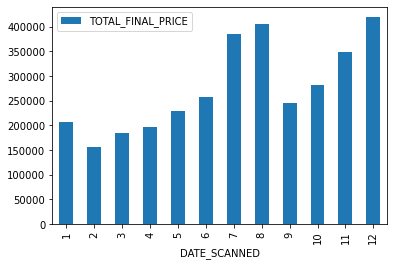

In [147]:
sale_month.plot(kind = "bar",legend = "total_sale_amount")

**From the plot, we can see that July,August and November, December are high season.**

**Summer has always been the high season. For November and Decement, Thanksgiving and Christmas motivates consumption.**

**The result may be a joint result of spontaneous action from customers and sales activities at these seasons.**

**Therefore, considering making sales strategies for those low seasons may be a good choice.**